# musicntwrk - basic functionalities overview

 A python library for pitch class set and rhythmic sequences classification and manipulation,
 the generation of networks in generalized musical spaces, and the sonification of arbitrary data
 See documentation at www.musicntwrk.com 

 Copyright (C) 2018,2019,2020 Marco Buongiorno Nardelli
 http://www.materialssoundmusic.com, mbn@unt.edu

 This file is distributed under the terms of the
 GNU General Public License. See the file `License'
 in the root directory of the present distribution,
 or http://www.gnu.org/copyleft/gpl.txt .

For a high quality graphics representation of networks, node and edge files can be written to disk in csv format and directly imported in visualization programs like Gephi (www.gephi.org)

To display musicxml in notation format a notation app should be installed (see for instance www.musescore.org) and should be defined in music21 preferences (see https://web.mit.edu/music21/doc/usersGuide/usersGuide_08_installingMusicXML.html)

#### Installation

pip install musicntwrk  
or  
pip install musicntwrk[with_MPI]  
(if there is a pre-existing installation of MPI, pip will automatically install the mpi4pi wrapper)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import re, sys, os, time
from musicntwrk import musicntwrk
from musicntwrk.musicntwrk import PCSet, MIDIset
from musicntwrk.plotting.drawNetwork import drawNetwork
from musicntwrk.plotting.drawNetwork3D import drawNetwork3D
mk = musicntwrk.musicntwrk(TET=12)

import itertools as iter
import numpy as np

#### Generation and classification of the full dictionary of pcs of cardinality 4 in 12TET

In [2]:
tetra,_ = mk.dictionary(space='pcs',Nc=4,row=False,order=0)

In [32]:
tetra

,class,pcs,interval
0,4-1,"[0,1,2,3]","[3,2,1,0,0,0]"
1,4-2,"[0,1,2,4]","[2,2,1,1,0,0]"
2,4-3,"[0,1,2,5]","[2,1,1,1,1,0]"
3,4-4,"[0,1,2,6]","[2,1,0,1,1,1]"
4,4-5,"[0,1,2,7]","[2,1,0,0,2,1]"
5,4-6,"[0,1,3,4]","[2,1,2,1,0,0]"
6,4-7,"[0,1,3,5]","[1,2,1,1,1,0]"
7,4-8,"[0,1,3,6]","[1,1,2,0,1,1]"
8,4-9Z,"[0,1,3,7]","[1,1,1,1,1,1]"
9,4-10,"[0,1,4,5]","[2,0,1,2,1,0]"


Generation of the network based on the interval vector distances between 2 and 3

In [3]:
nodes, edges = mk.network(space='pcs',dictionary=tetra,thup=3,thdw=2.5,distance='euclidean',
                           prob=1,write=False)

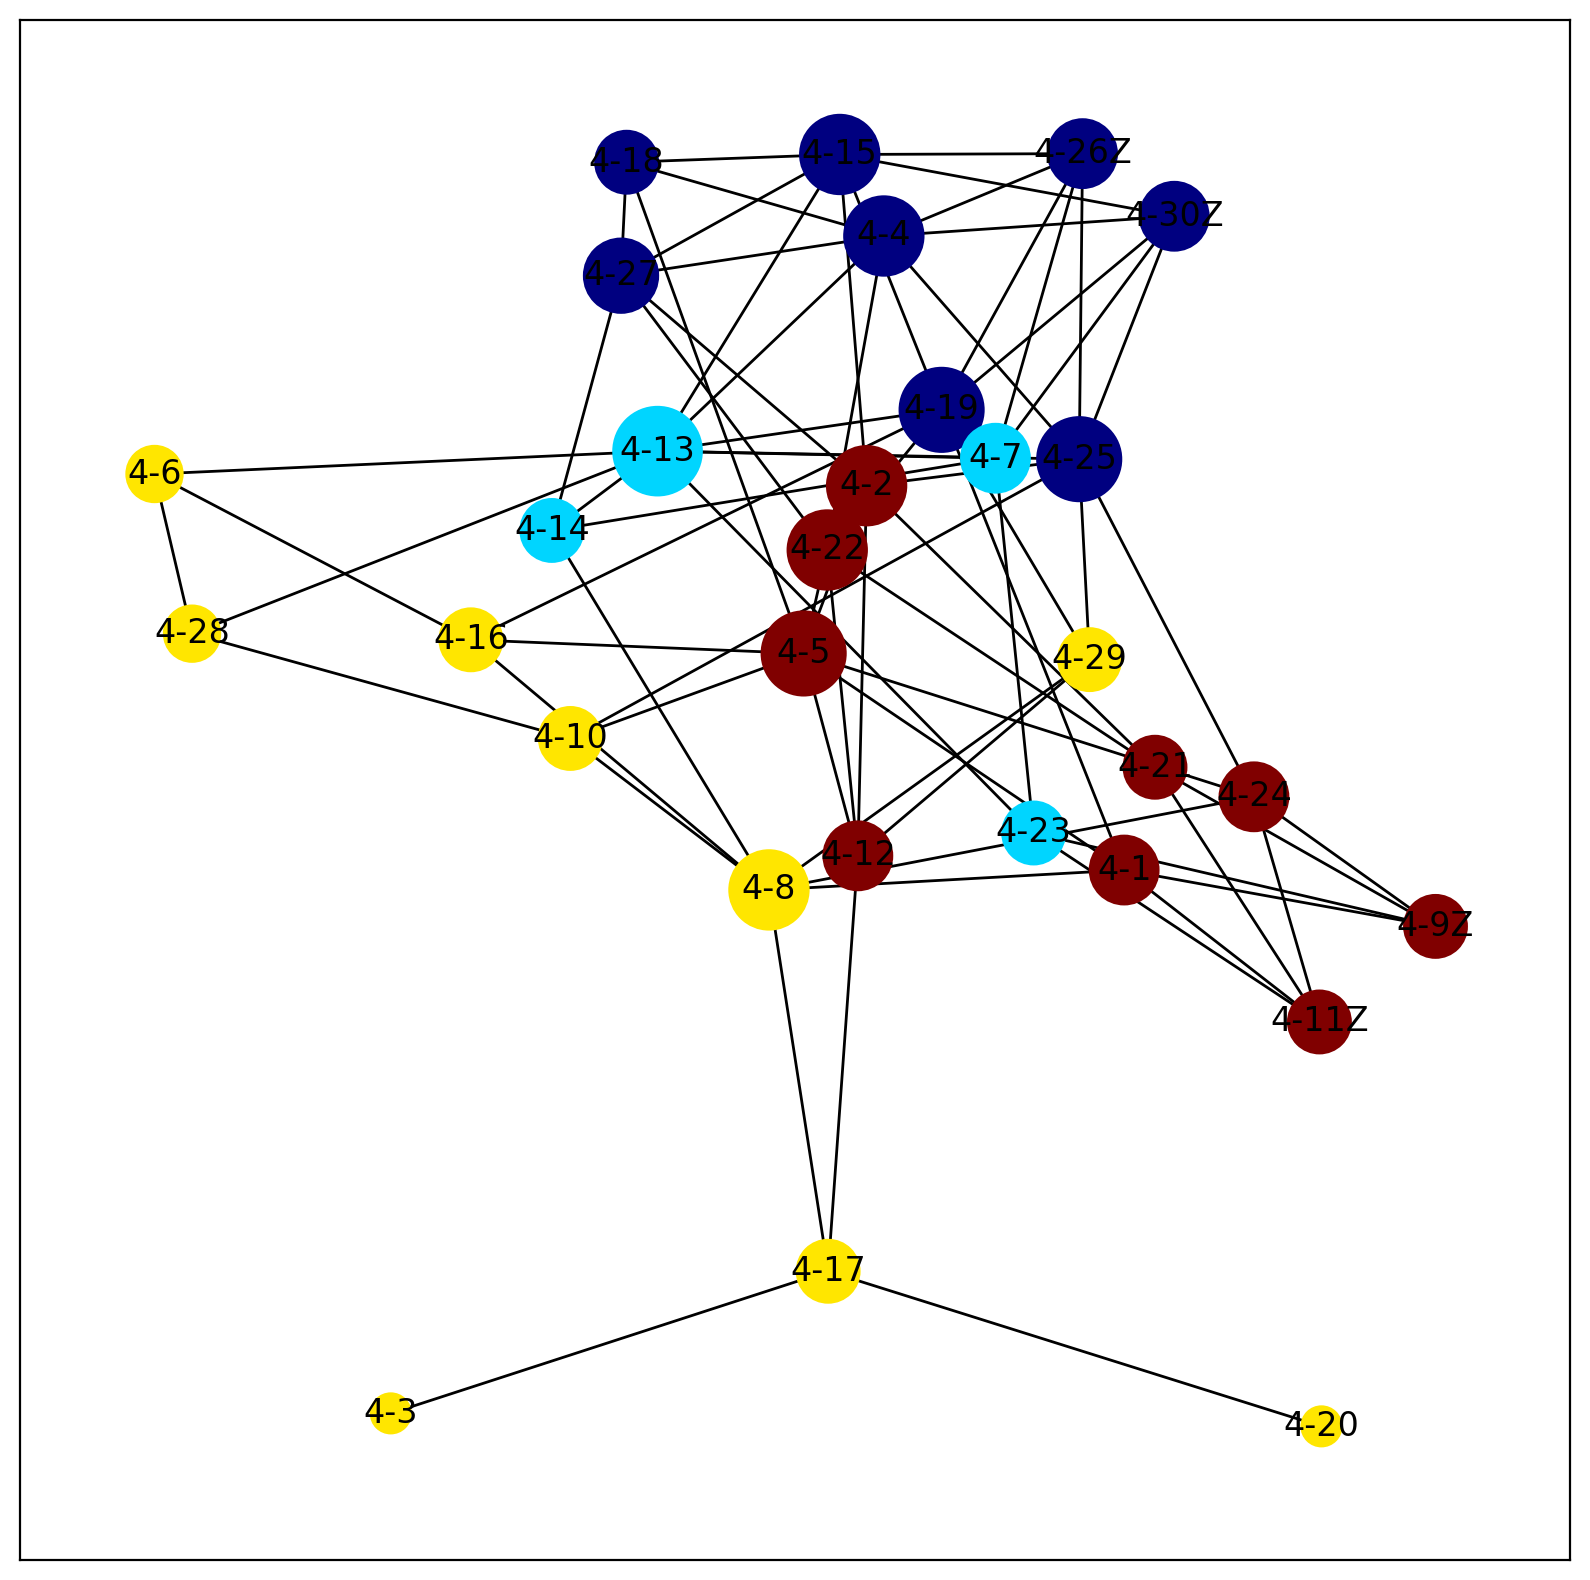

In [4]:
drawNetwork(nodes=nodes,edges=edges)

Generation of the ego network based on the interval vector distance from node _4-7_

In [5]:
nodes_ego,edges_ego,edges_alters = mk.network(space='pcsEgo',label='4-7',dictionary=tetra,
                                              thup_e=30.0,thdw_e=0.1,thup=30.1,thdw=1.1,
                                              distance='euclidean',write=False)

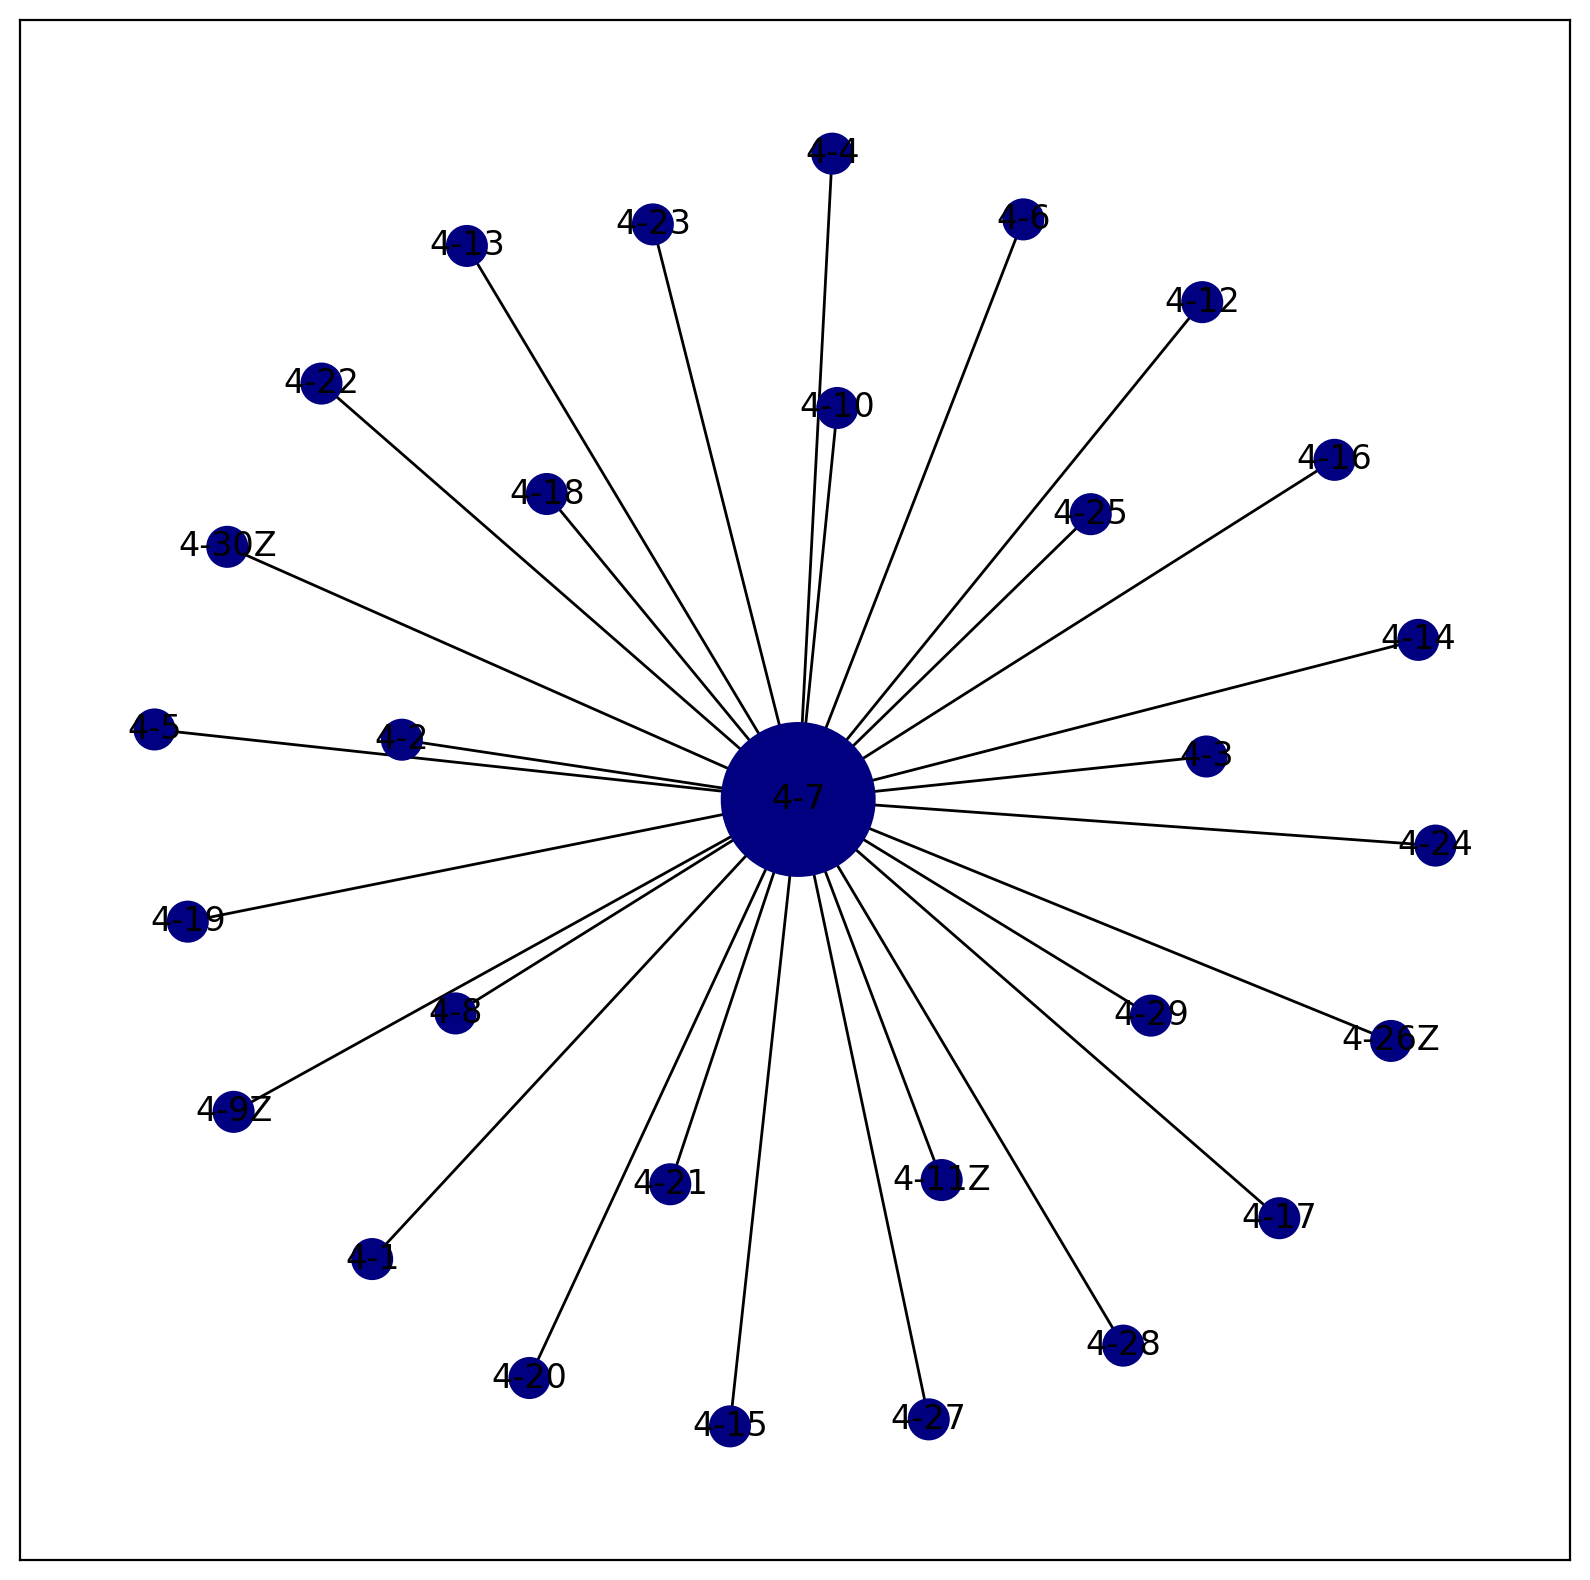

In [6]:
drawNetwork(nodes=nodes_ego,edges=edges_ego)

#### generation of voice leading network for the panchromatic triadic space based on the voice leading distance operator __O__(1) <br> and the voice leading operator __O__(1,1)<br>

In [7]:
triads,z = mk.dictionary(space='pcs',Nc=3,row=True,order=1,a=[0,2,4,5,7,9,11])

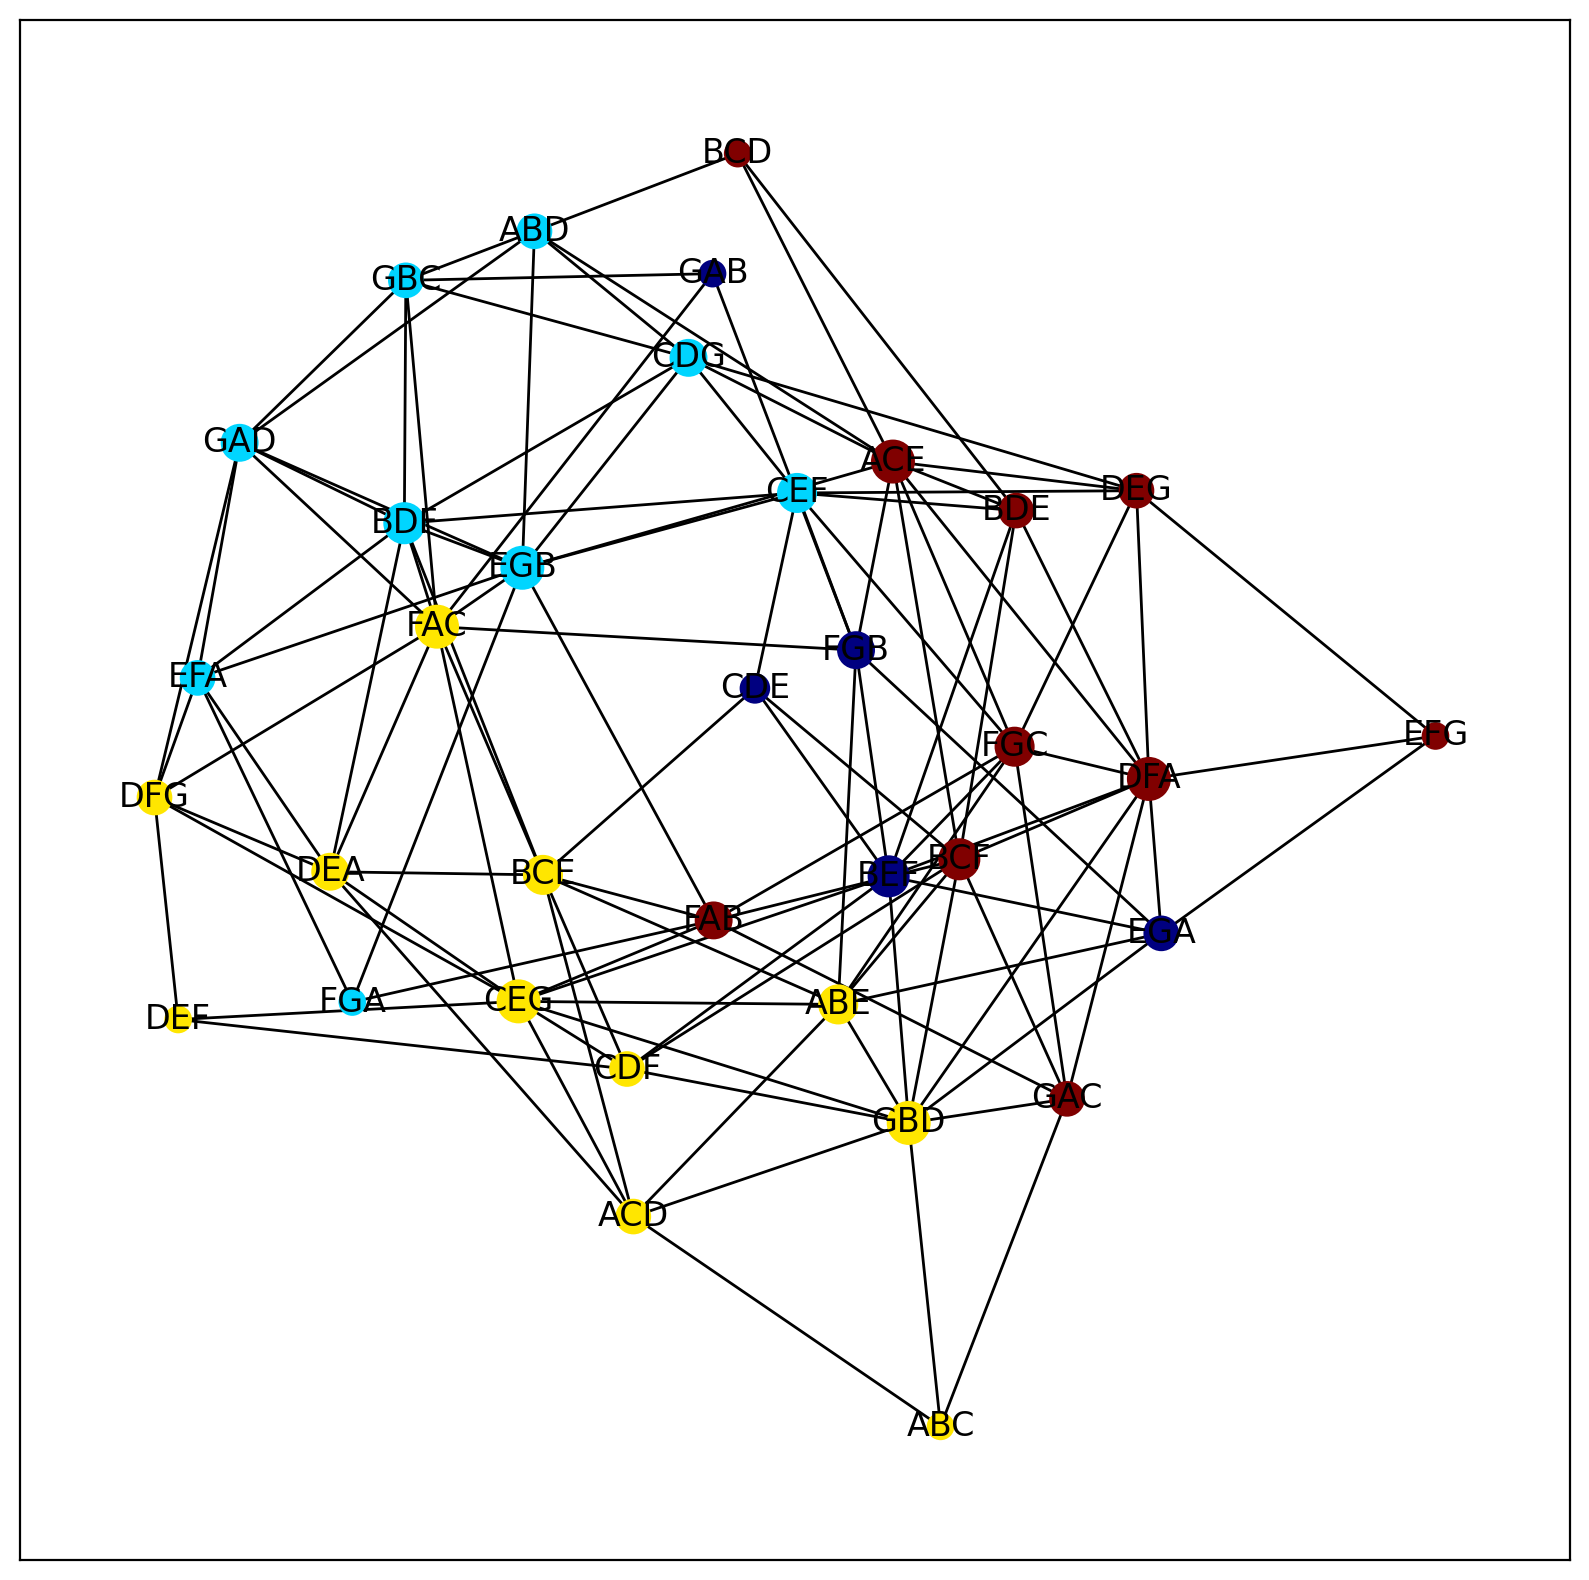

In [8]:
nodes, edges = mk.network(space='vLead',vector=True,dictionary=triads,thup=2.9,thdw=2.2,distance='euclidean',
                           prob=1,write=False,pcslabel=True)
drawNetwork(nodes=nodes,edges=edges,scale=0.2,grphtype='undirected')

In [9]:
triads,z = mk.dictionary(space='pcs',Nc=3,row=True,order=1,a=[0,2,4,5,7,9,11])
nodes, edges = mk.network(space='vLead',vector=False,ops=True,name=['O(1,2)'],
                          dictionary=triads,distance='euclidean',prob=1,write=False,pcslabel=True)

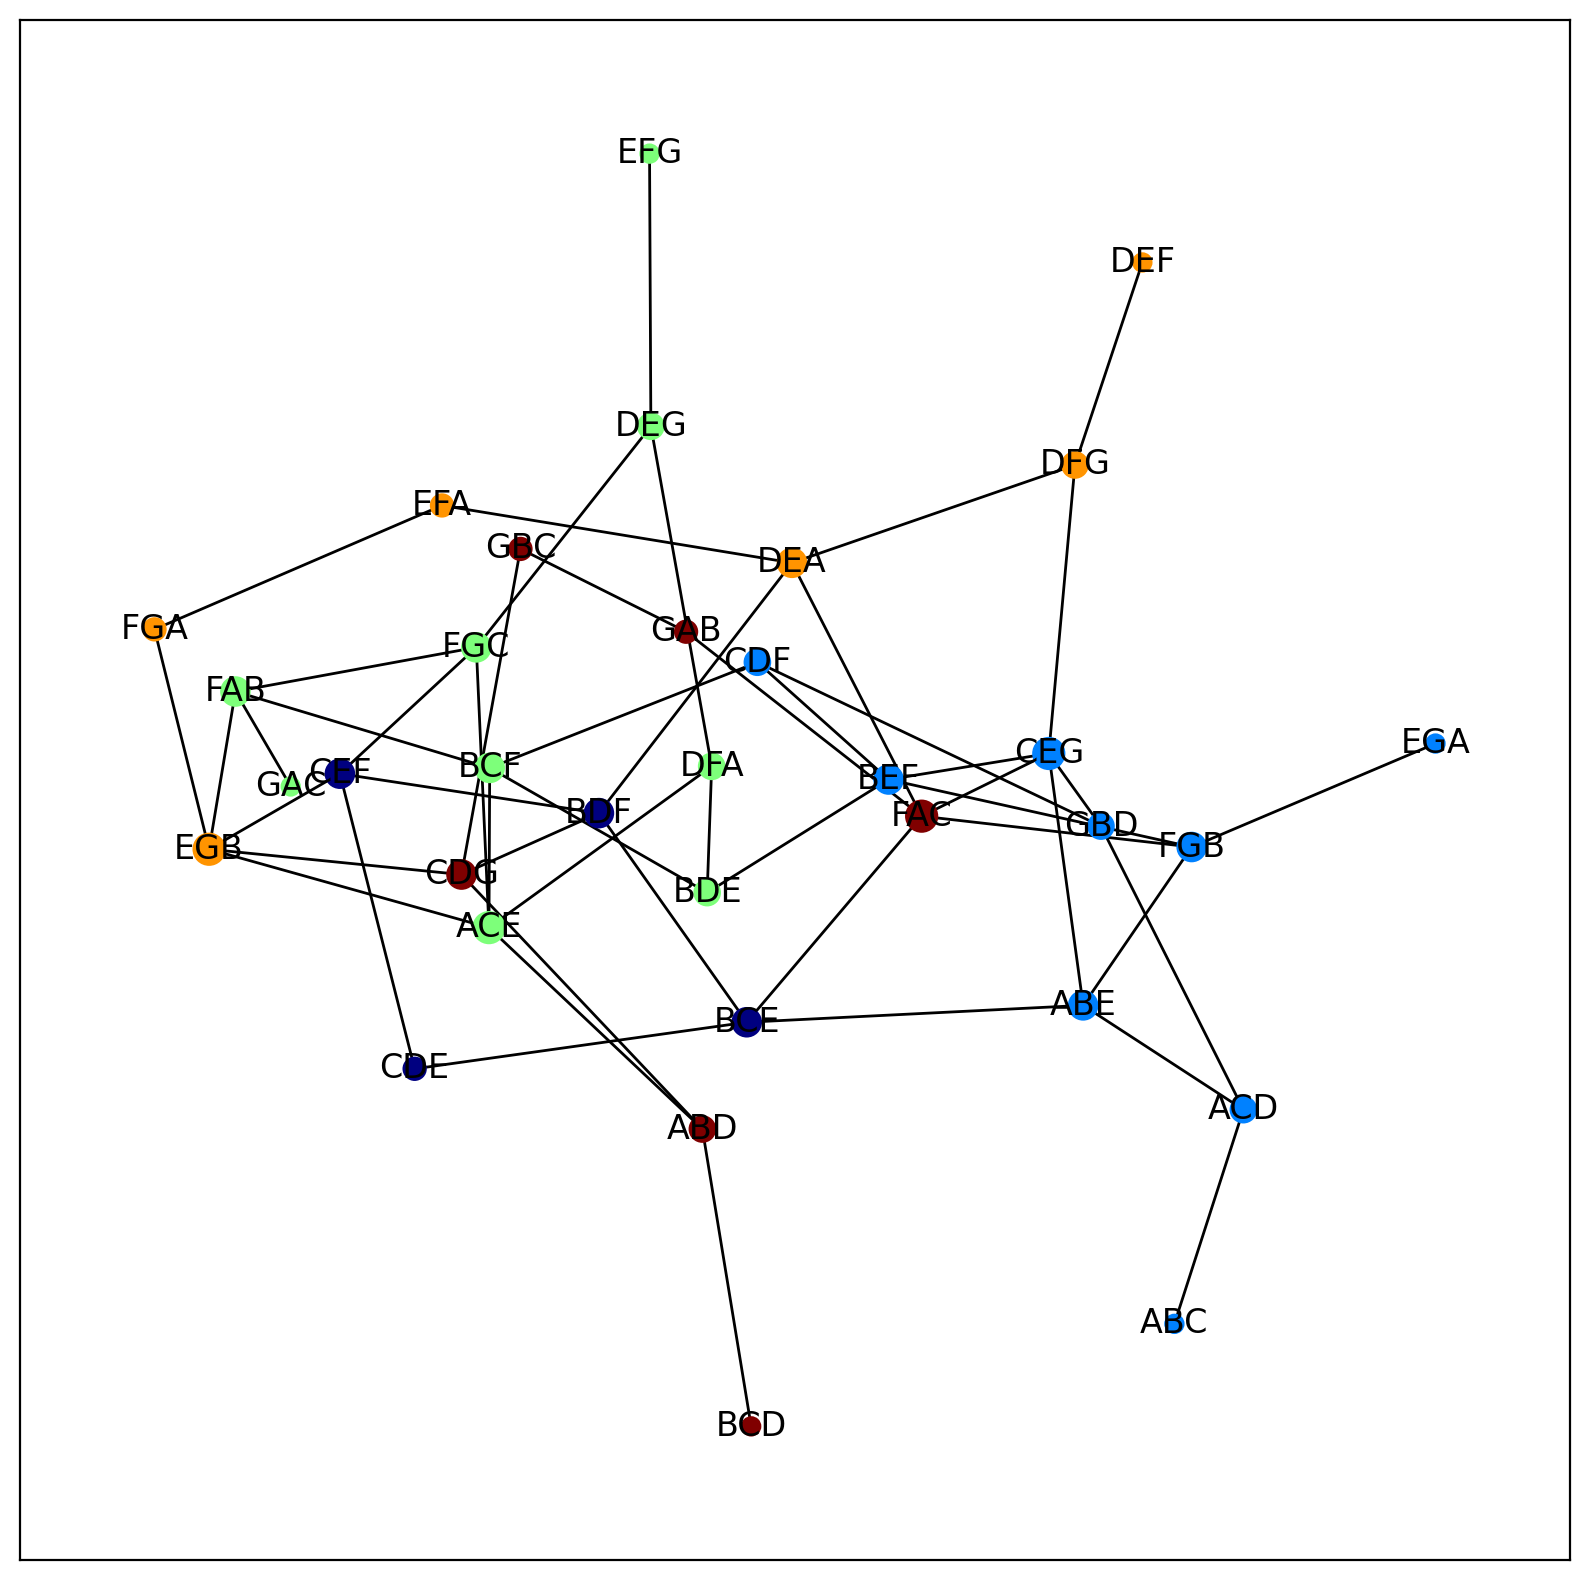

In [10]:
drawNetwork(nodes=nodes,edges=edges,scale=0.2,grphtype='undirected')

In [11]:
drawNetwork3D(nodes,edges)

#### Anaysis of J.S. Bach chorale from BWV66
musicxml file from music21 corpus

In [12]:
!python --version

Python 3.10.11


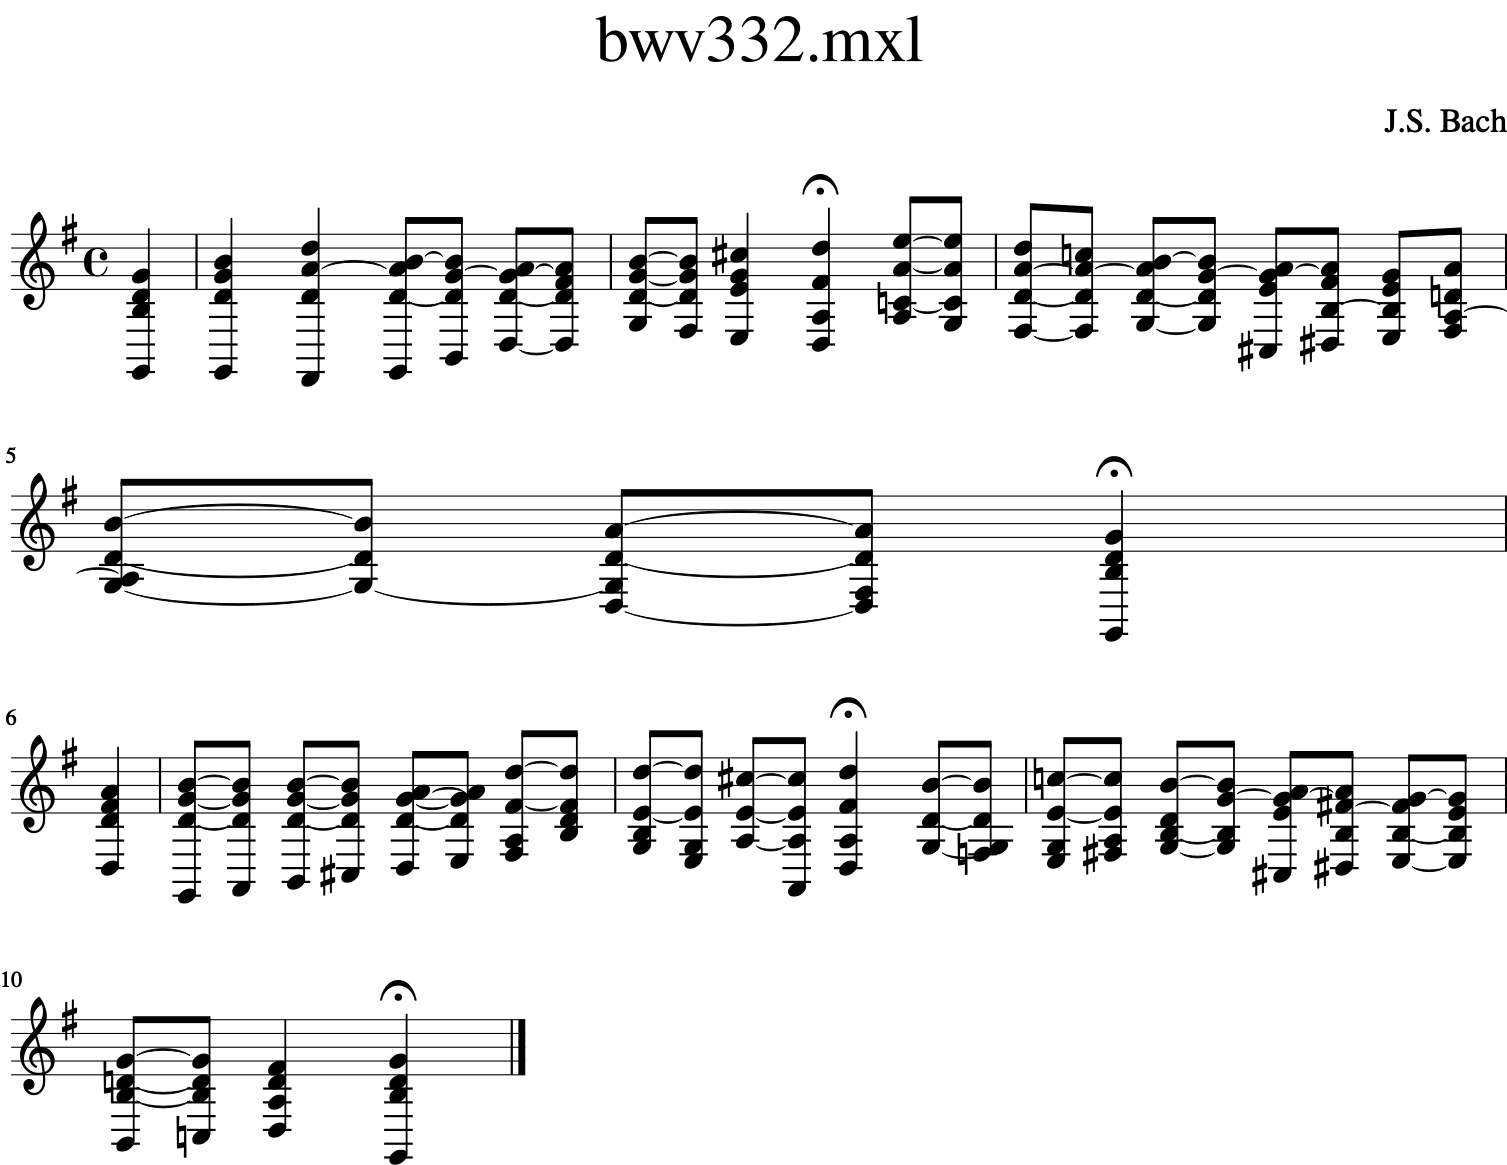

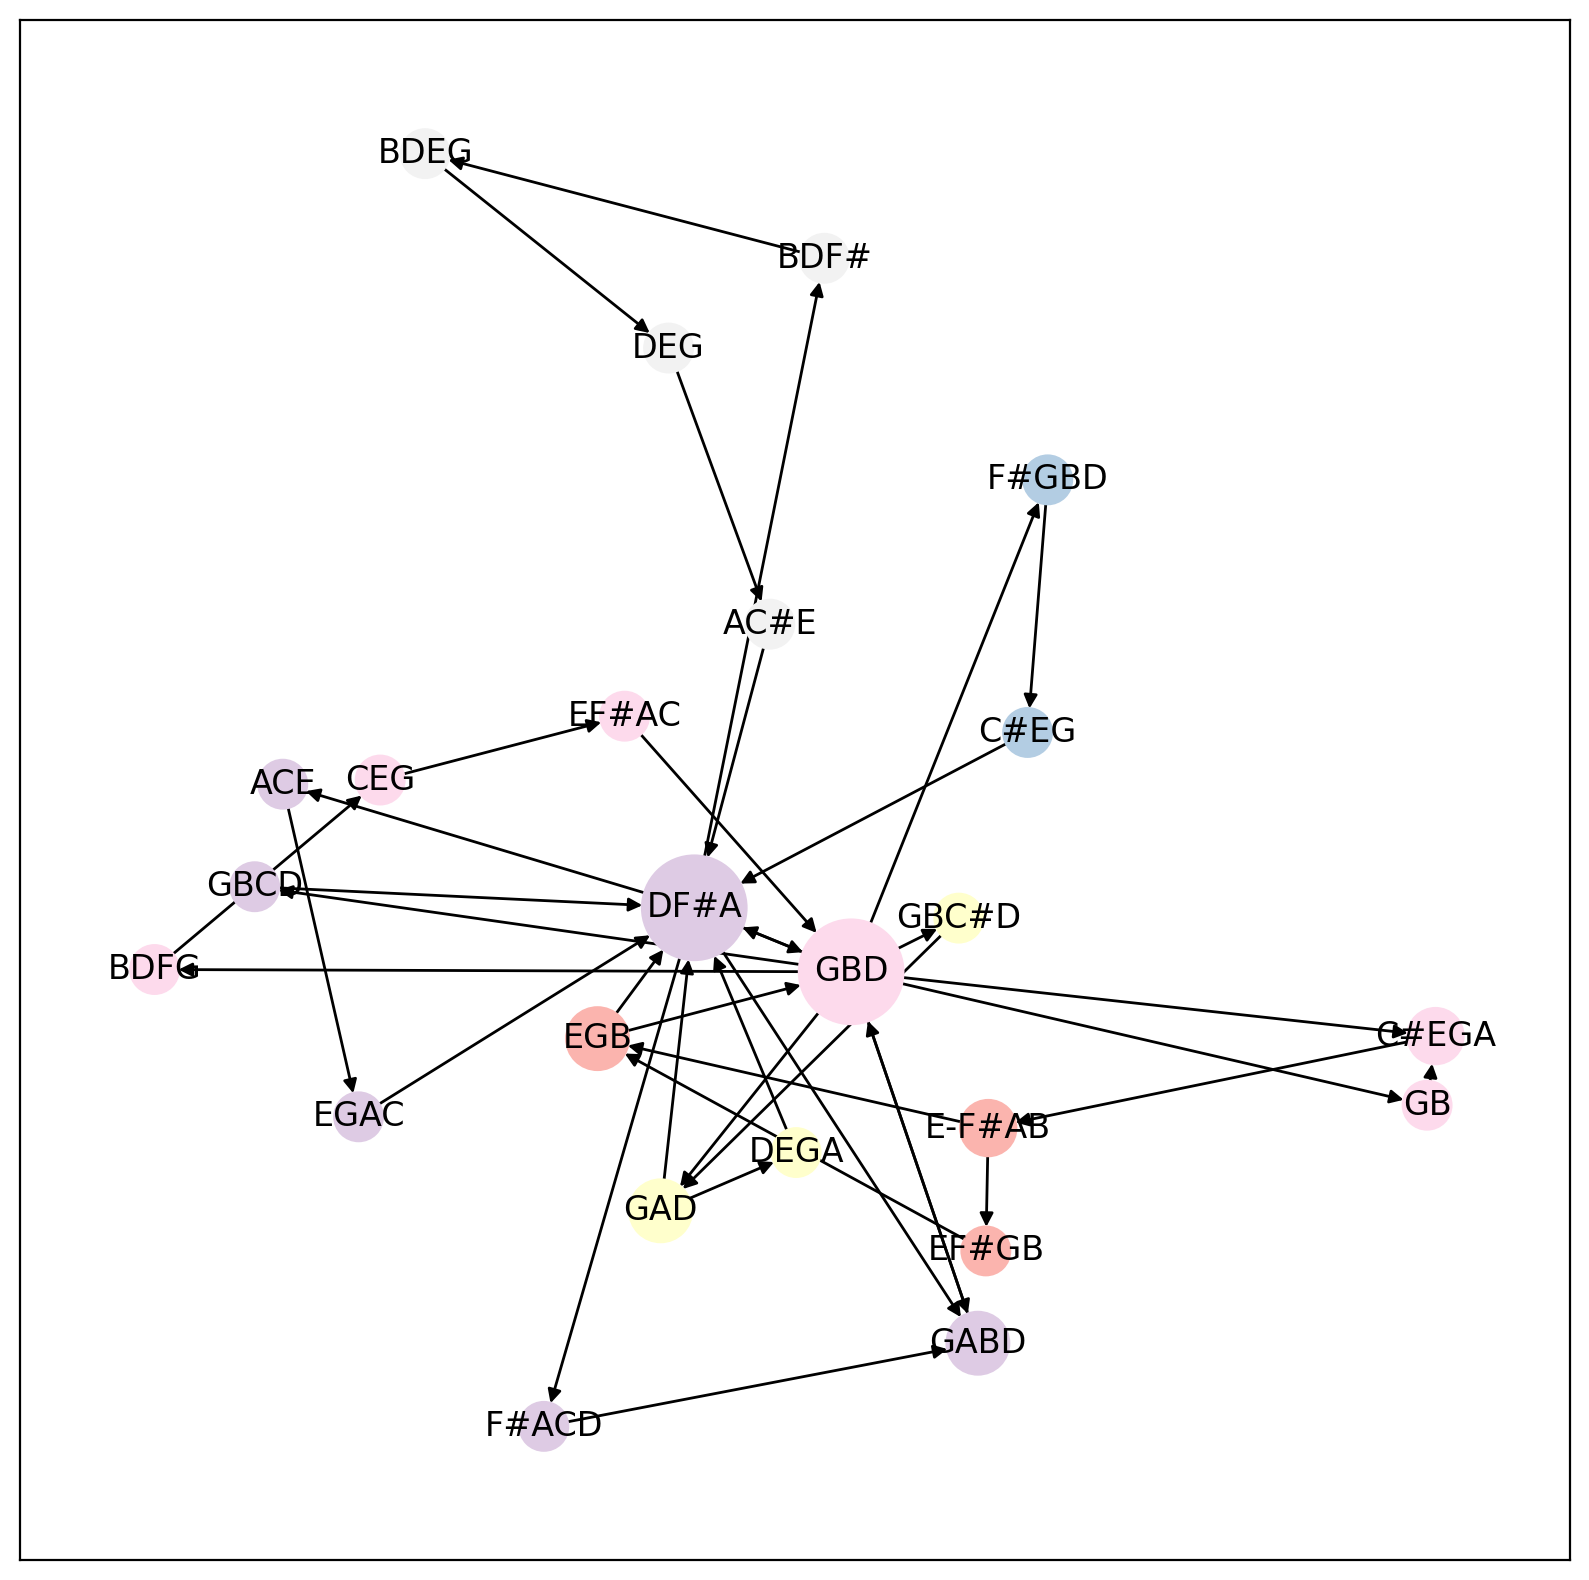

In [13]:
import music21 as m21
bachChorale = m21.corpus.parse('bwv332').metadata.corpusFilePath
# bachChorale = 'omnibus.mxl'
seq,_,dscore = mk.dictionary(space='score',scorefil=bachChorale,music21=True,show=True)
nodes,edges,_,_,_,_,_ = mk.network(space='score',seq=seq,ntx=True,general=False,distance='euclidean',
                                   grphtype='directed')
drawNetwork(nodes=nodes,edges=edges,grphtype='directed',colormap='Pastel1')

In [14]:
drawNetwork3D(nodes,edges)

In [25]:
nodes.to_csv('nodes.csv')
edges.to_csv('edges.csv')

In [15]:
from musicntwrk.utils.score2vLead import score2vLead
from musicntwrk.plotting.drawNetworkViz import drawNetworkViz

In [16]:
nodict = score2vLead(nodes,dscore)

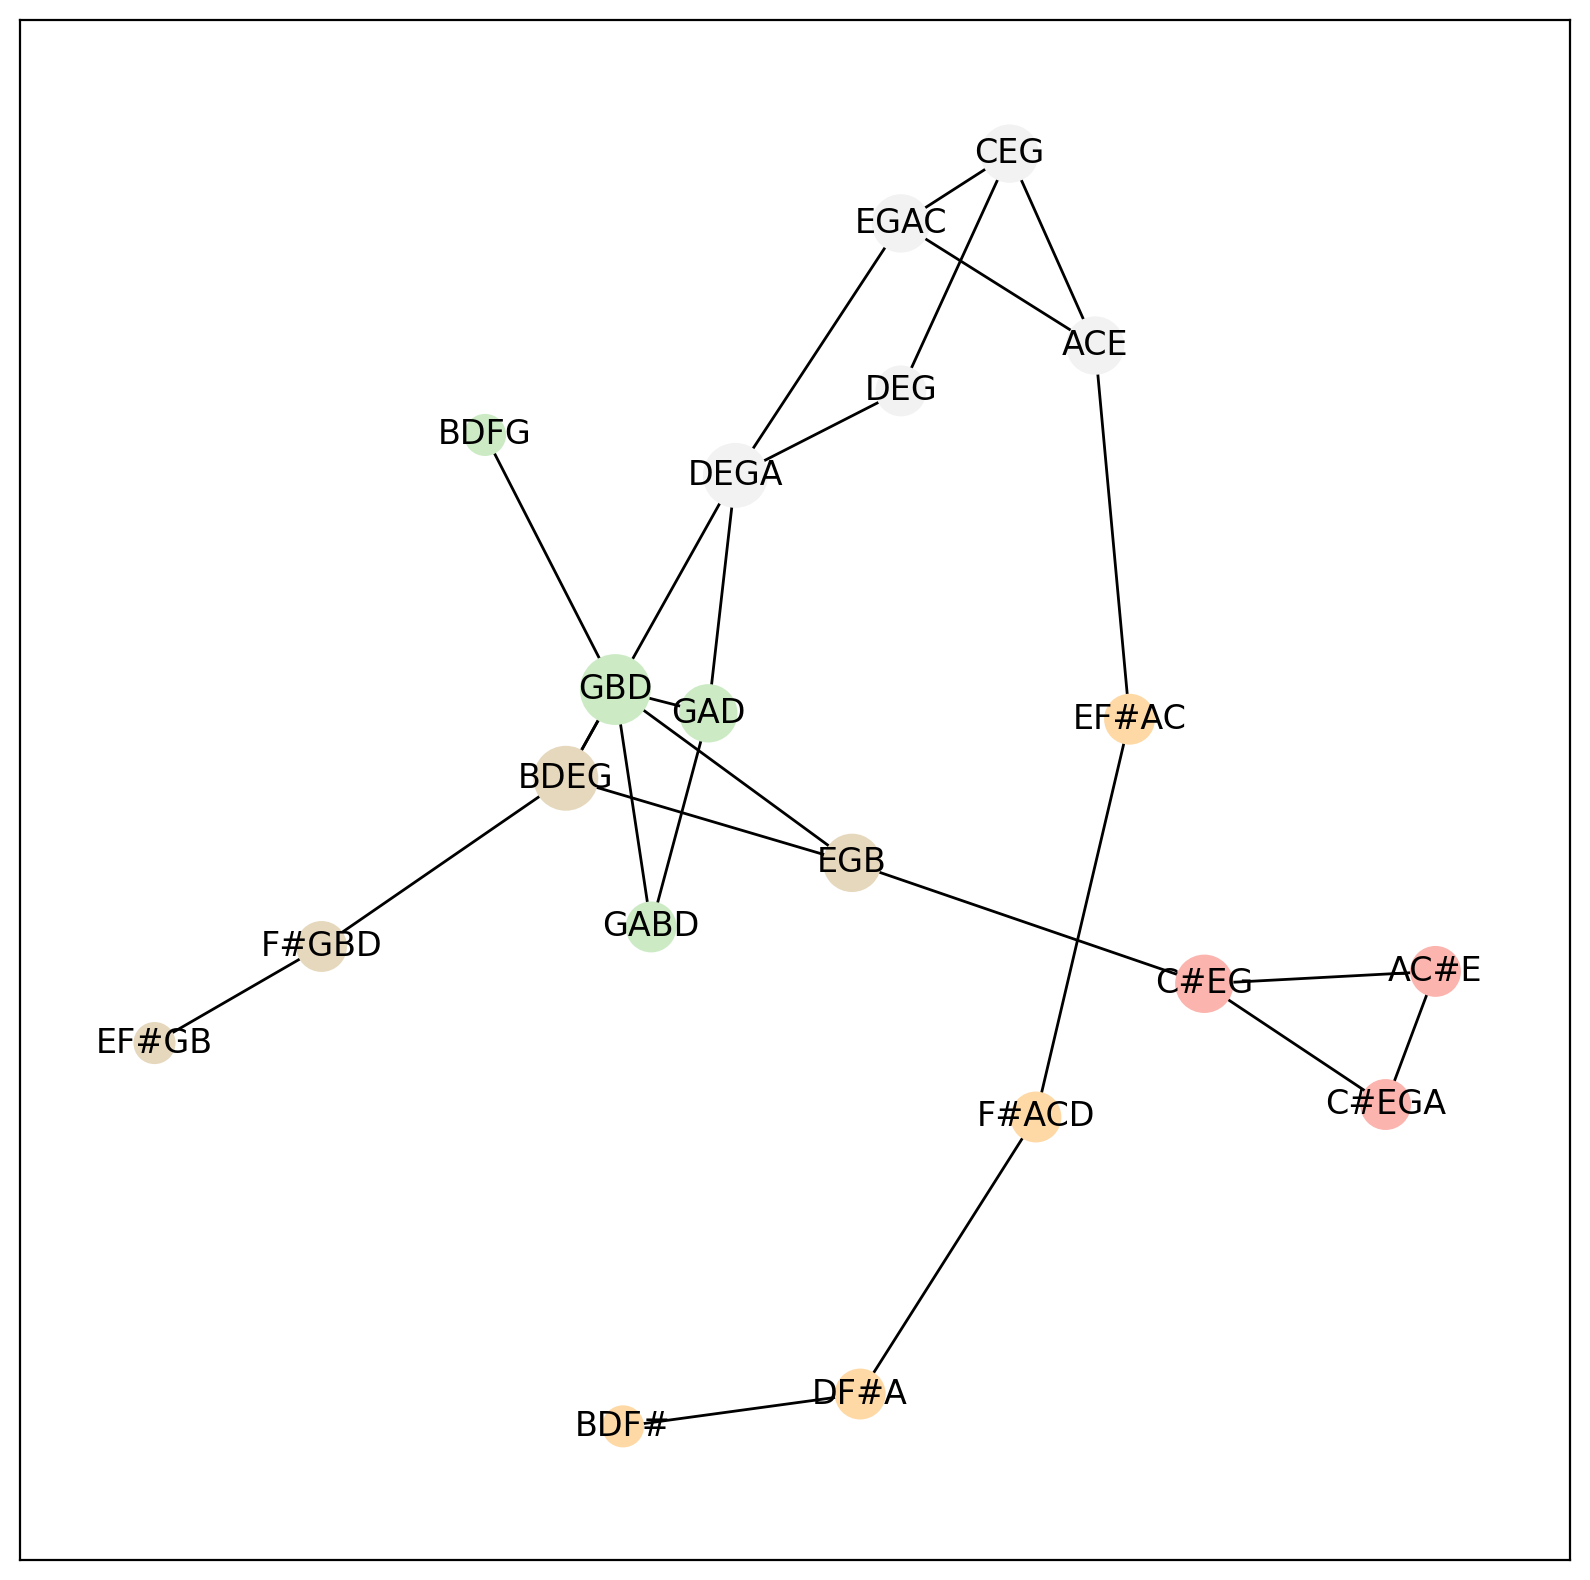

In [17]:
nodesop, edgesop = mk.network(space='vLead',vector=False,ops=True,name=['O(2)'],
                          dictionary=nodict,distance='euclidean',prob=1,write=False,pcslabel=True)
drawNetwork(nodes=nodesop,edges=edgesop,grphtype='undirected',colormap='Pastel1')

In [22]:
nodesop.to_csv('nodesop.csv')
edgesop.to_csv('edgesop.csv')

In [18]:
drawNetworkViz(nodes,[edges,edgesop],engine='neato',strict=True)

In [19]:
from musicntwrk.plotting.plotOpsHistogram import plotOpsHistogram

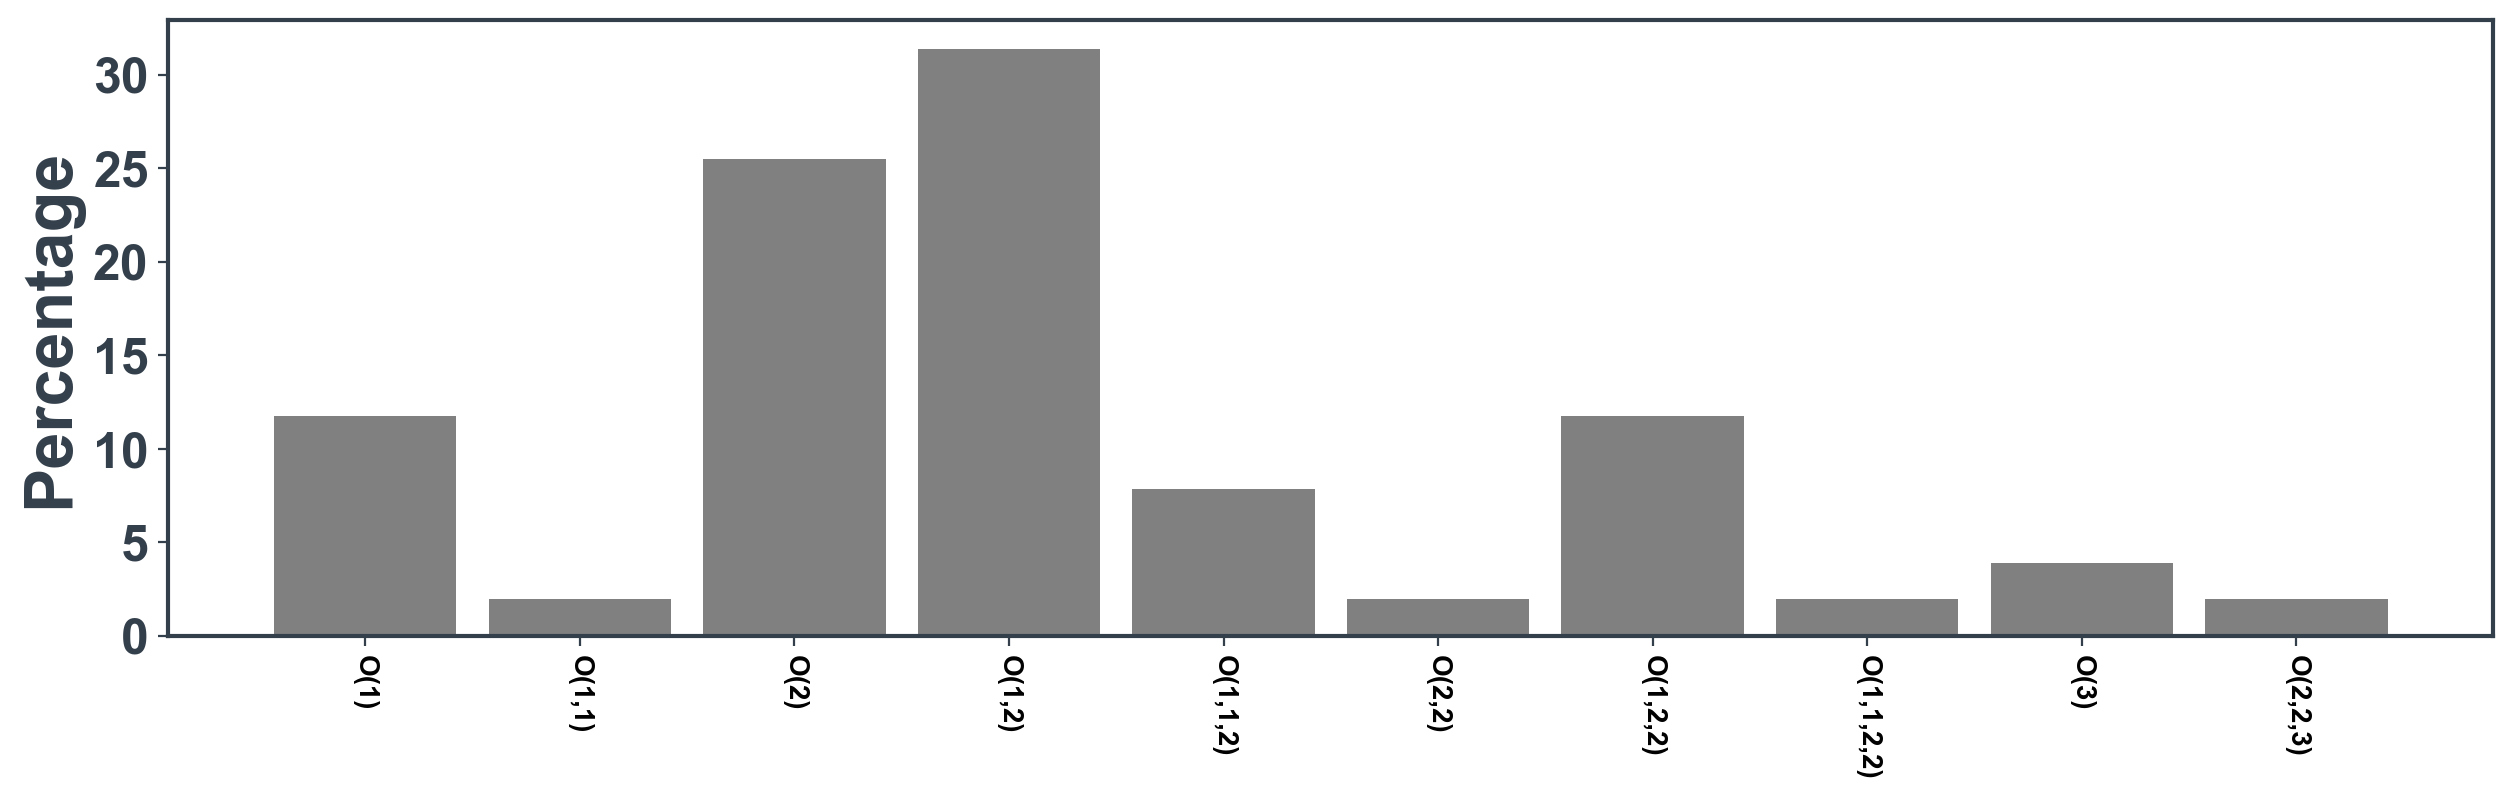

In [20]:
_,_ = plotOpsHistogram(edges)

#### Generation and classification of the rhythmic cells  of cardinality 3 in a given sequence

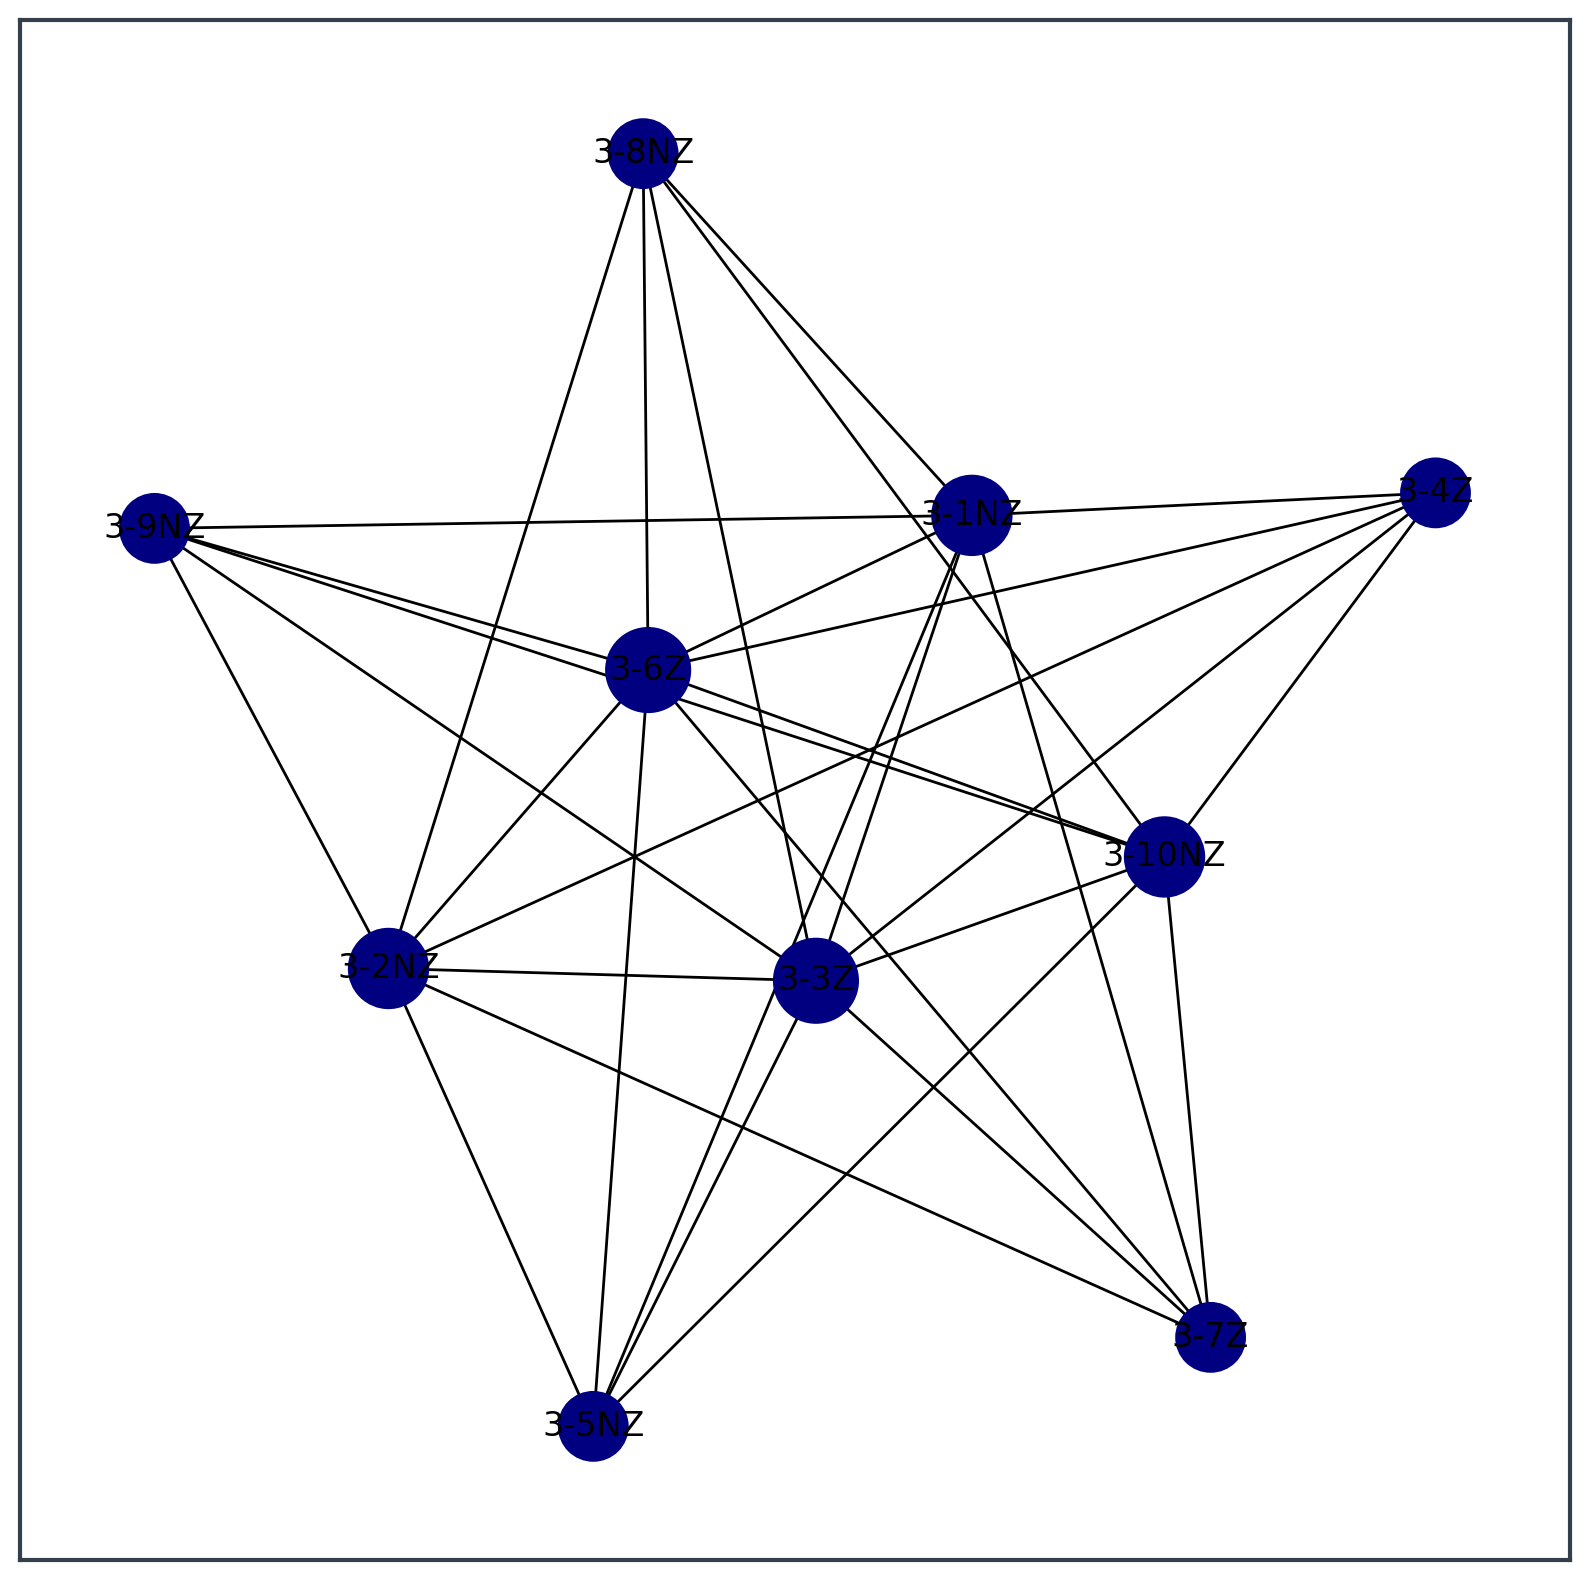

In [21]:
dictrtm,_ = mk.dictionary(space='rhythm',Nc=3,a=['q','q','e','e','ed','s'],REF='s')
nodes,edges = mk.network(space='rhythm',dictionary=dictrtm,thup=50,thdw=0.1,
                         distance='euclidean',prob=1,write=False)
drawNetwork(nodes=nodes,edges=edges)

Generation of voice leading network for the cells of cardinality 3 of the rhythmic of N equal duration elements

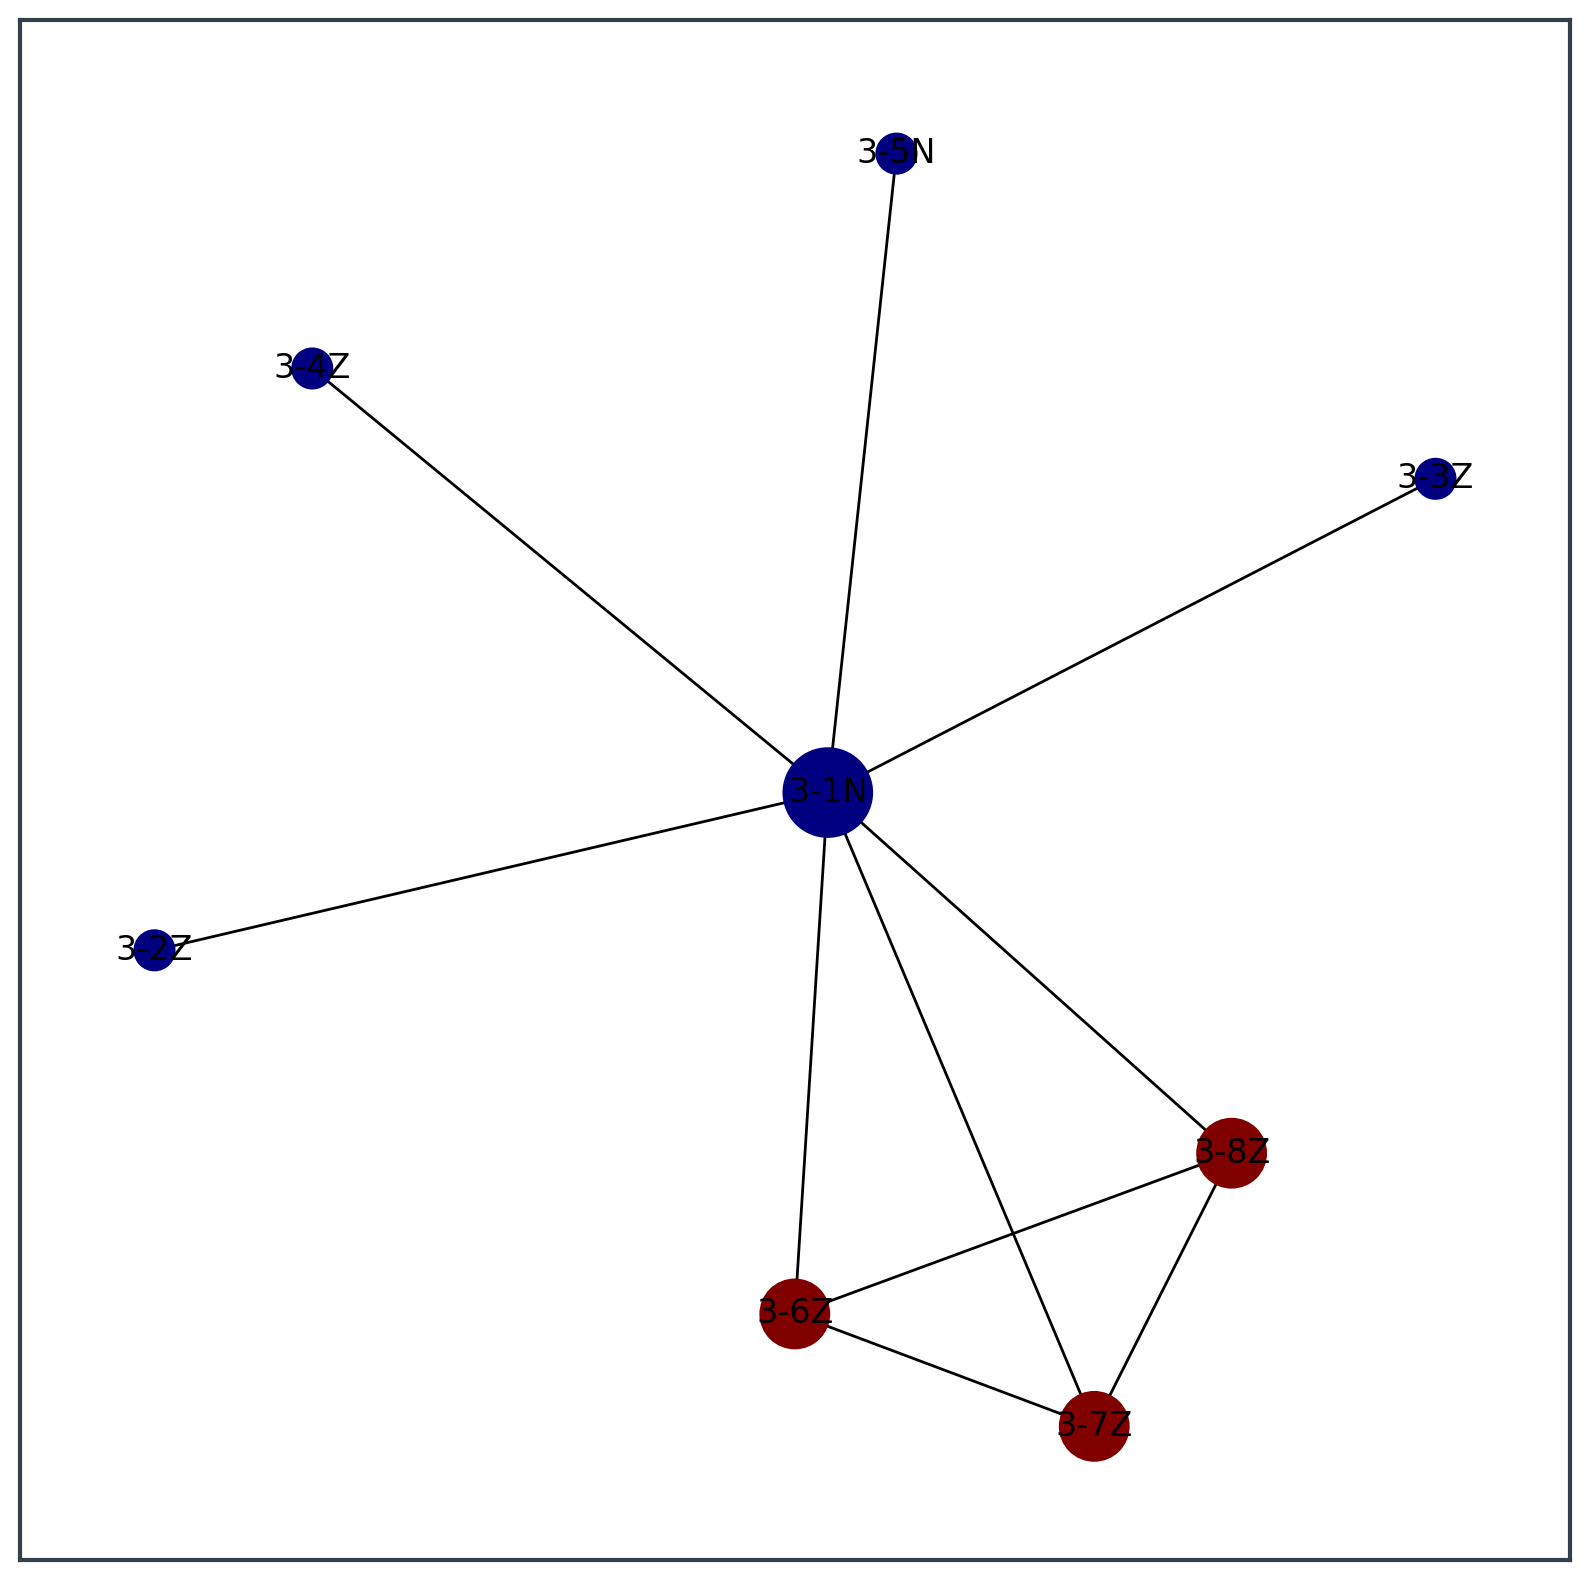

In [22]:
dictrtm,_ = mk.dictionary(space='rhythmP',N=6,Nc=3,REF='s')
nodes,edges = mk.network(space='rLead',dictionary=dictrtm,thup=50,thdw=0.1,
                         distance='euclidean',prob=1,write=False)
drawNetwork(nodes=nodes,edges=edges)

#### Spectral sonification of data using a FIR filter (requires data file and an installation of pyo on the system)

In [33]:
mk.sonify(descriptor='spectrum',data='ZnO.dat',length=5)

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: Midi Device (APC Key 25), not an output device!


#### Transcription of data from file in single/multiple column format (requires data file) - TET 24 microtonal

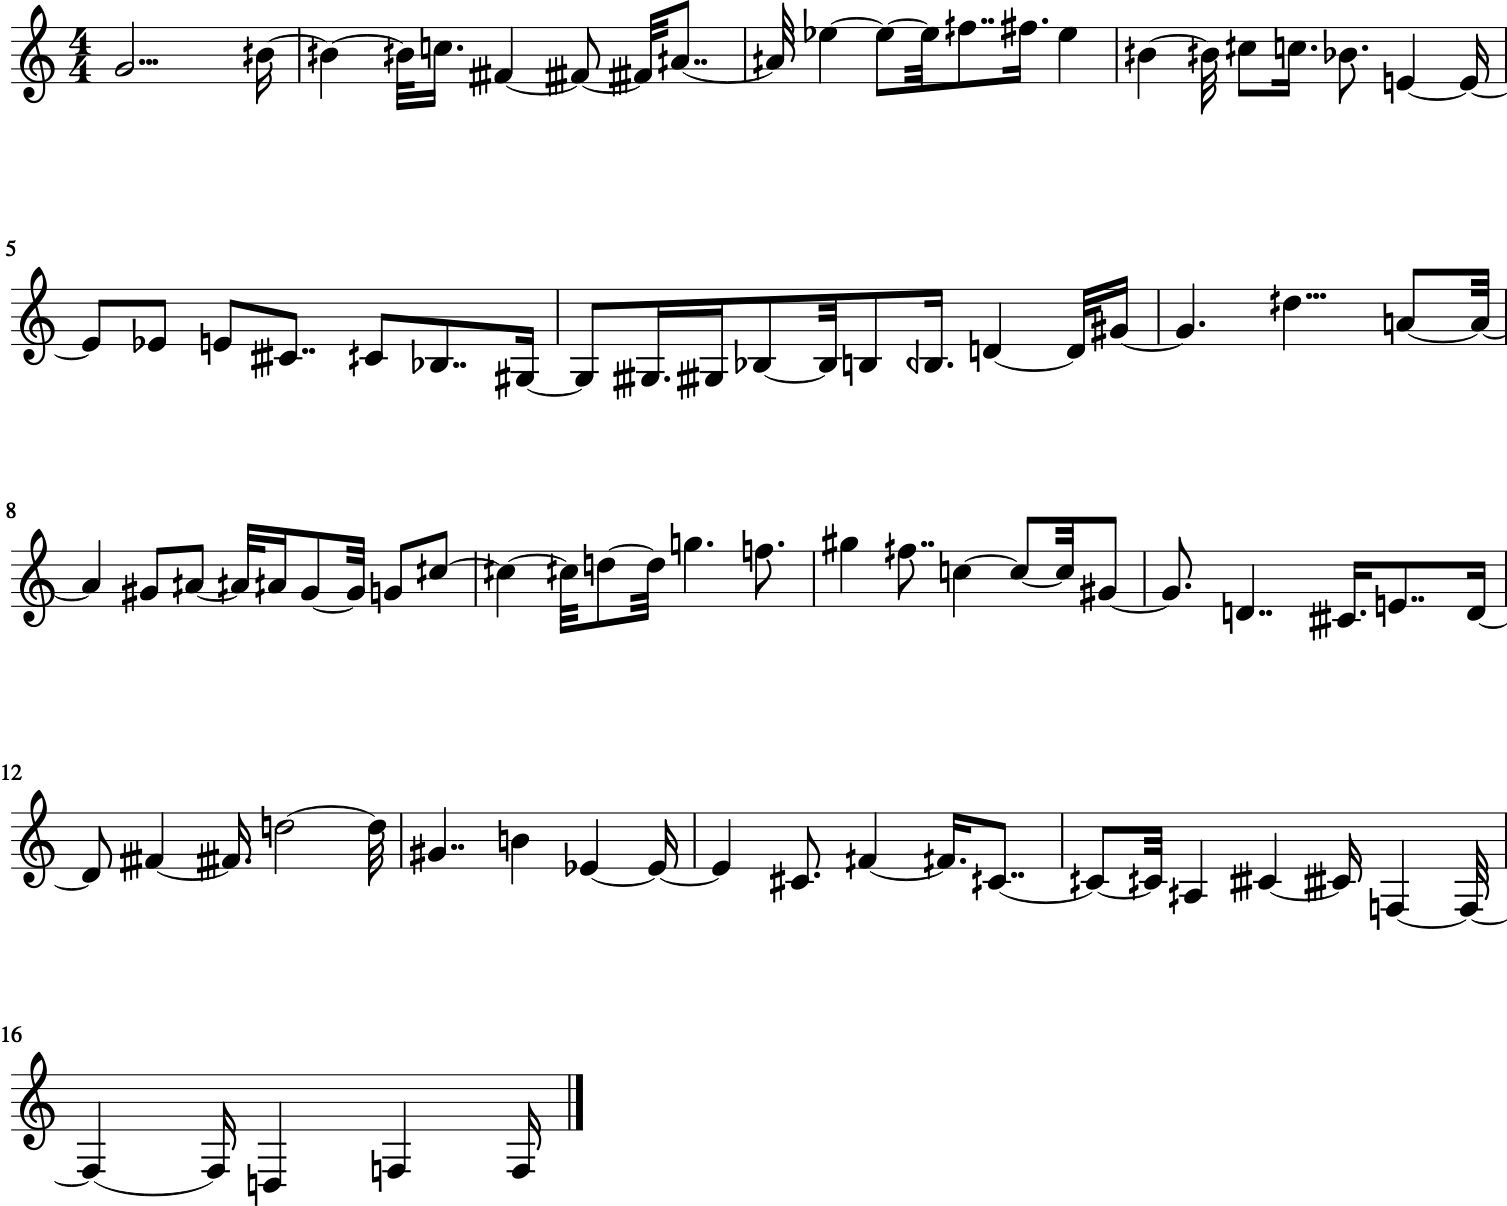

In [24]:
mk.sonify(descriptor='melody',data='flux.dat',scalemap='interval',ini=62,fin=92,fac=2,dur=4,transp=12,col=0)

#### Example of orchestration analysis - JS Bach 2nd Brandenburg Concerto, BWV 1047, Allegro

In [25]:
from musicntwrk.networks.orchestralVectorColor import orchestralVectorColor

         check the musicxml file for internal consistency


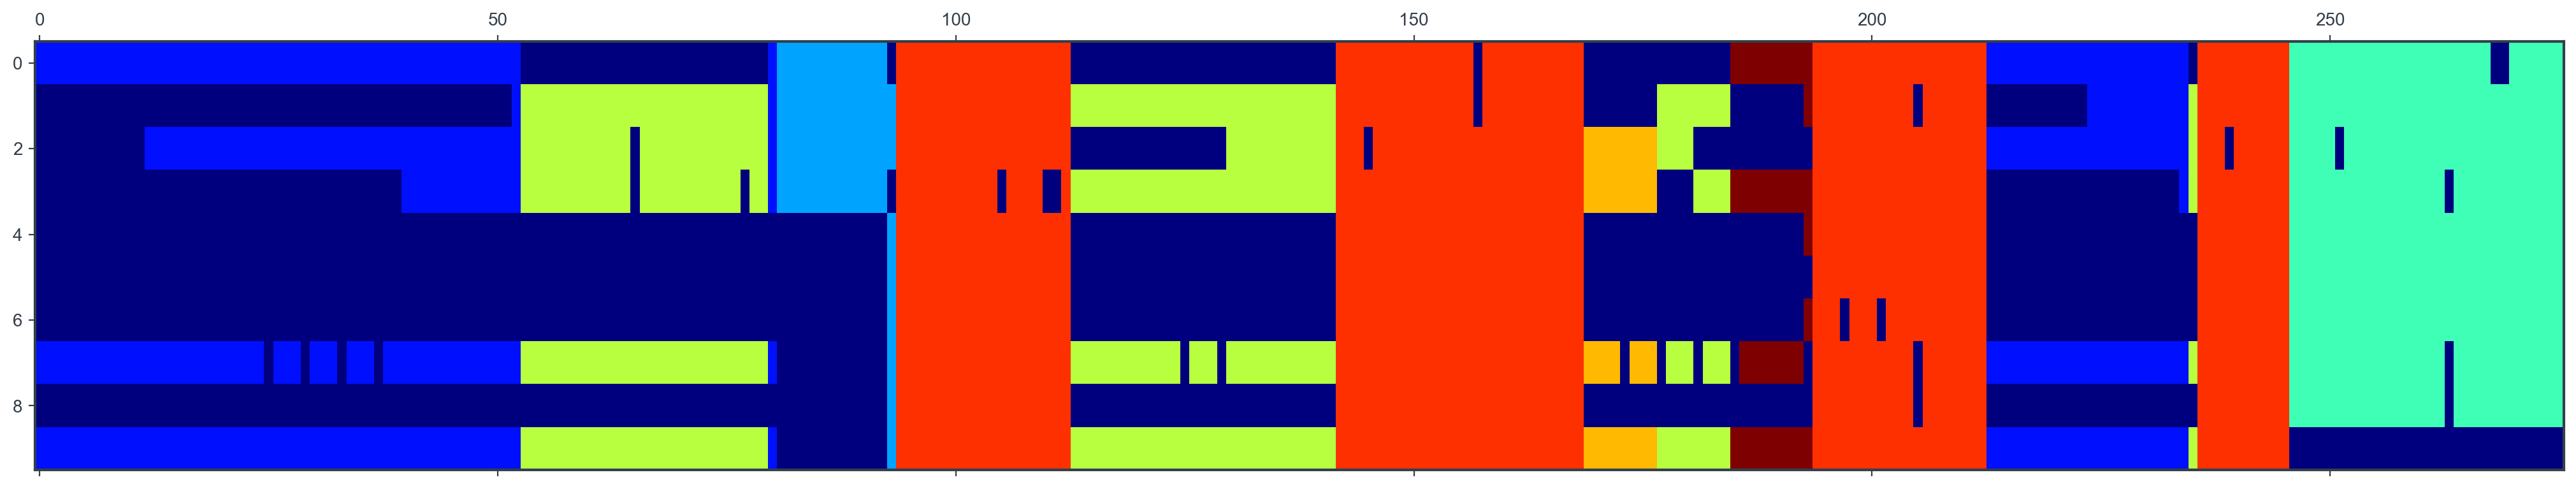

In [26]:
bwv1047 = 'BWV1047-Allegro.mxl'
score,orch,num = mk.dictionary(space='orch',scorefil=bwv1047)
nodes,edges,deg,modul,part = mk.network(space='orch',seq=orch,distance='euclidean')
orchestralVectorColor(orch,nodes,part,color='jet')

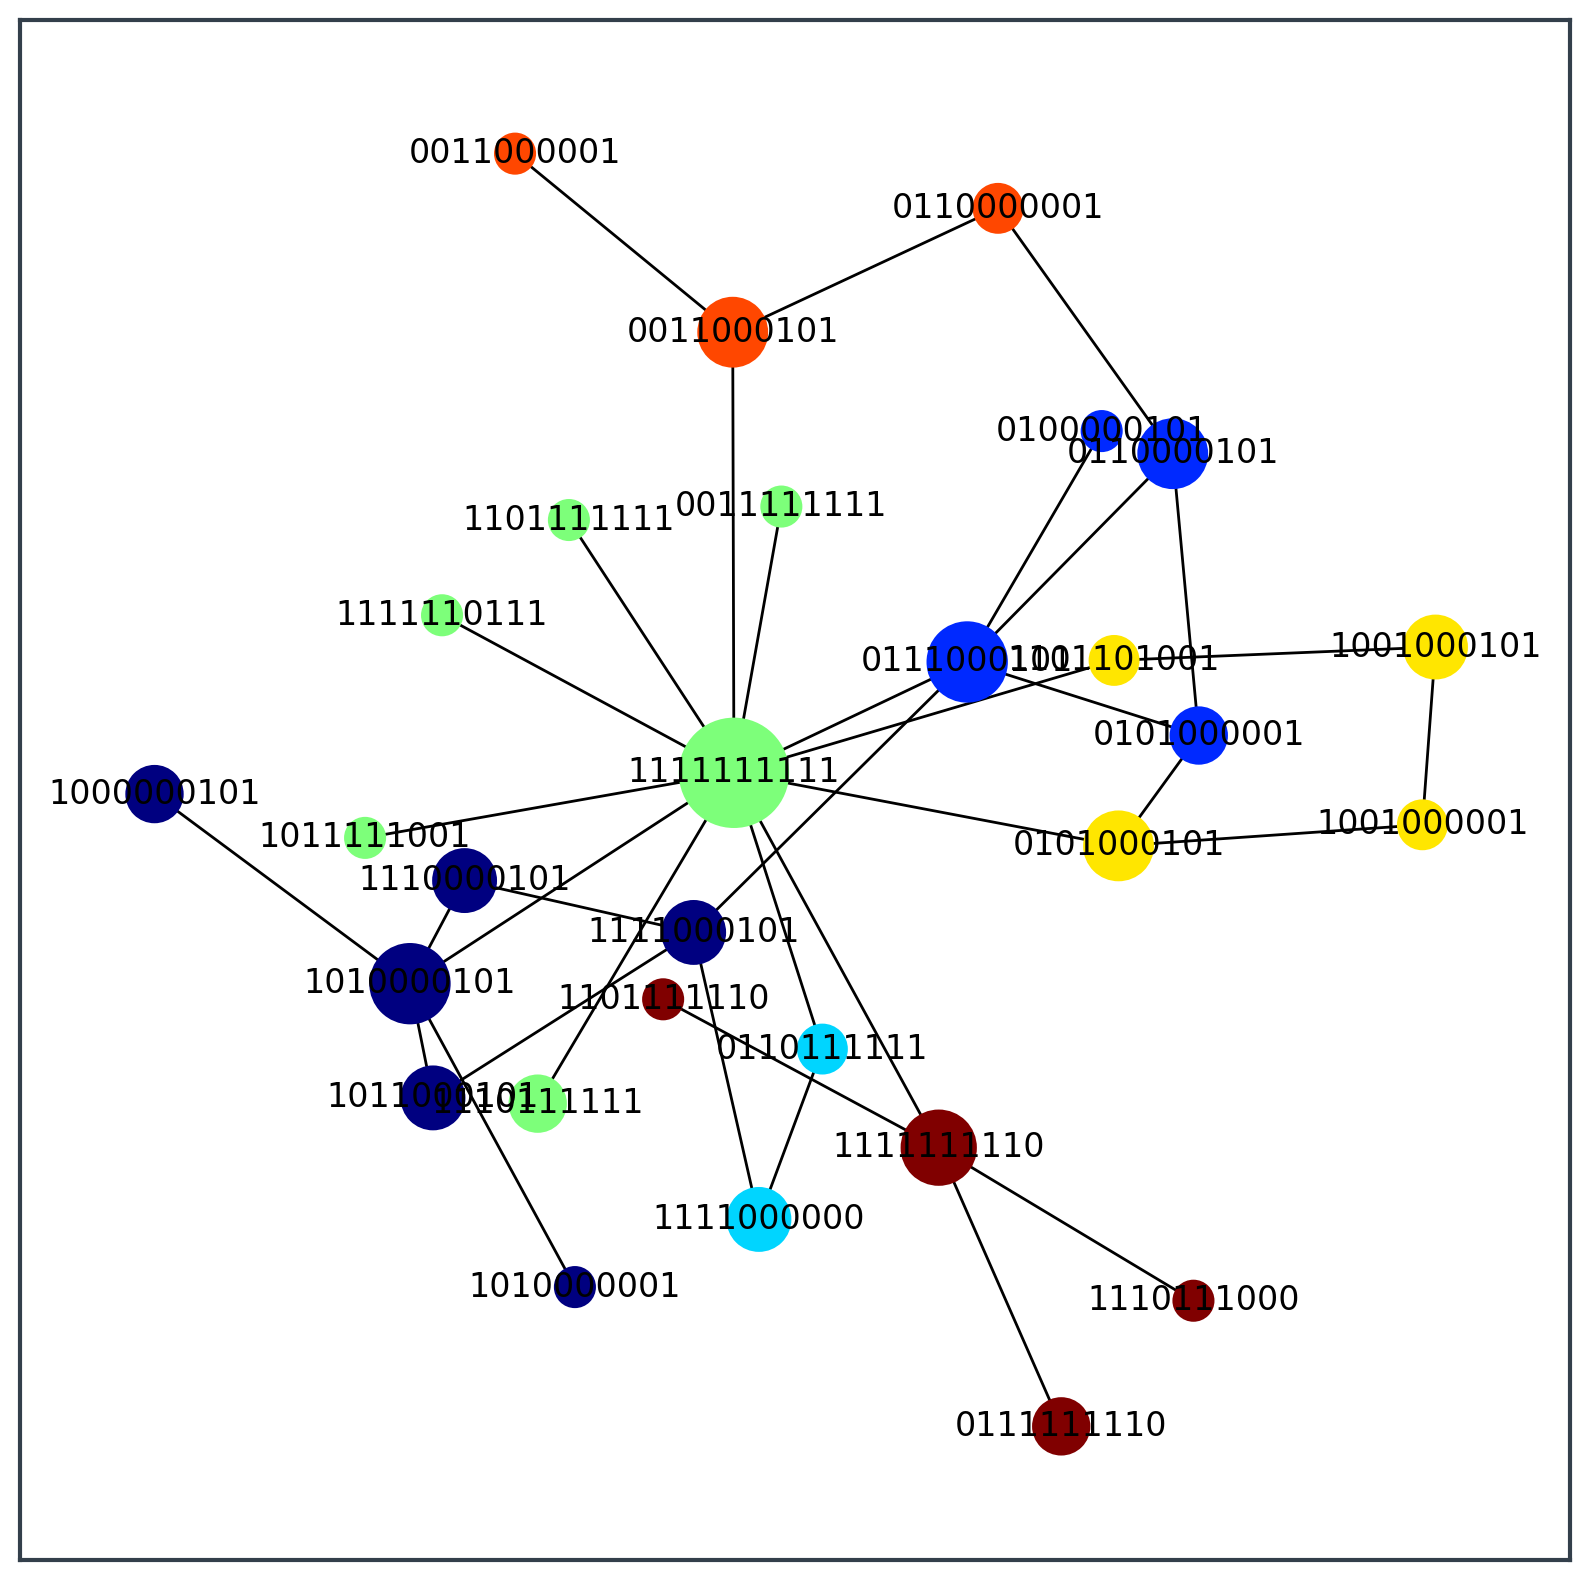

In [27]:
drawNetwork(nodes=nodes,edges=edges)

#### Examples of spectral analysis (Mel Frequency Cepstrum Coefficient) and sound transcription

In [28]:
from musicntwrk.plotting.plotCC import plotCC

In [29]:
wavpath = './'
waves,ascbw,ascbwu = mk.timbre(descriptor='ASCBW',path=wavpath,wavefil='b4_v4_09.wav',
                               method='MC',scnd=True,nstep=500,standard=True)

sound is  ['./b4_v4_09.wav']
primary decay constant   =  0.114
secondary decay constant =  0.177
spectral centroid        =  2897
bandwidth                =  2464


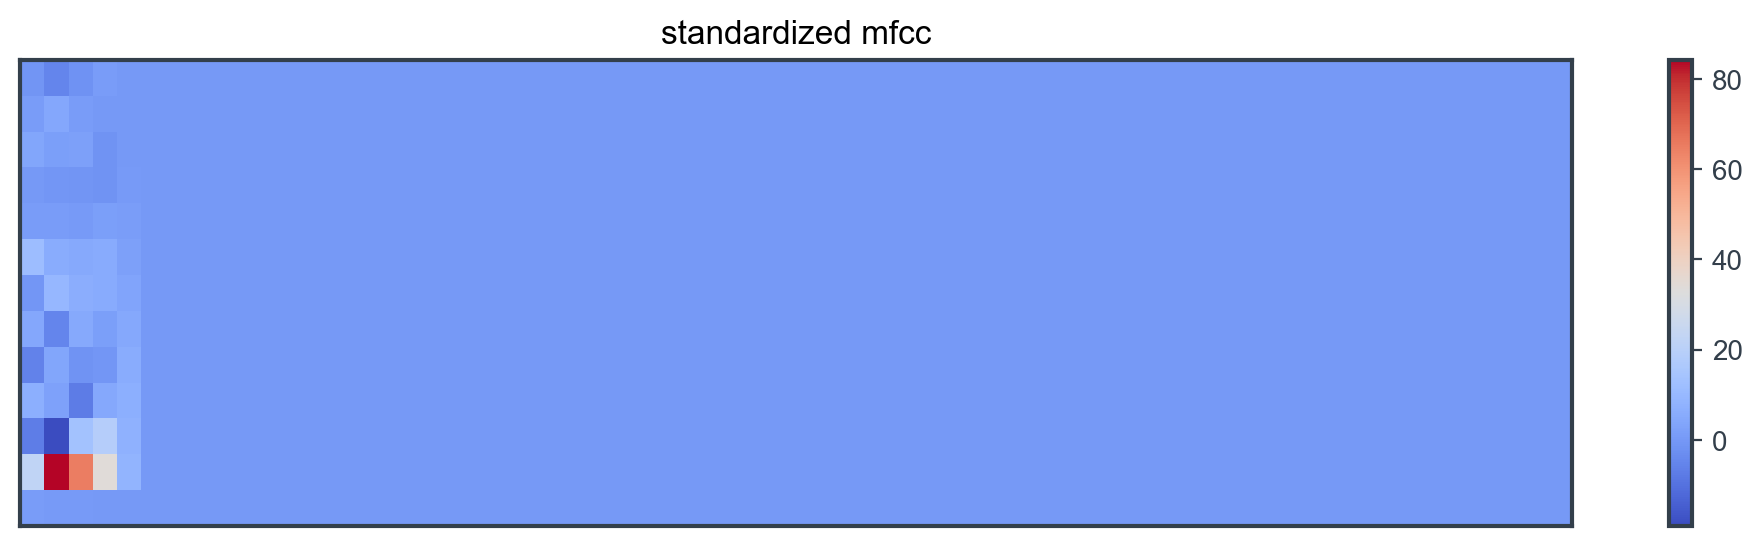

In [30]:
waves,mfcc0,mfcc = mk.timbre(descriptor='MFCC',path=wavpath,wavefil='b4_v4_09.wav',
                             nmel=13,ncc=13,standard=True,nbins=64,lmax=220500)
plotCC(mfcc0[0],title='standardized mfcc')

In [2]:
mk.sonify(descriptor='sound',data='vm1.wav',crm=True,tms=True,write='musicxml')